In [117]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [8]:
CHTR = pd.read_csv("CHTR.csv")
CPRT = pd.read_csv("CPRT.csv")
LIN = pd.read_csv("LIN.csv")
VNO = pd.read_csv("VNO.csv")

In [72]:
CHTR['Date'] = pd.to_datetime(CHTR['Date'])
CPRT['Date'] = pd.to_datetime(CPRT['Date'])
LIN['Date'] = pd.to_datetime(LIN['Date'])
VNO['Date'] = pd.to_datetime(VNO['Date'])

In [73]:
CHTR['Company'] = 'CHTR'
CPRT['Company'] = 'CPRT'
LIN['Company'] = 'LIN'
VNO['Company'] = 'VNO'

In [74]:
DF_base = pd.concat([CHTR, CPRT, LIN, VNO])

In [75]:
DF = DF_base.copy()

In [76]:
#1.
DF[DF['Close'] != DF ['Adj Close']][['Company', 'Close', 'Adj Close']].groupby(['Company']).count().iloc[:, 0]

Company
LIN    1020
VNO    1059
Name: Close, dtype: int64

Yes, LIN and VNO companies doesn't have same exactly same values for the Close and Adj Close columns. Indeed, this means that those companies in a certai date incorporated actions, such as stock splits, dividends, and rights offerings

In [77]:
#2. Max value
DF[['Company', 'Adj Close']].groupby(['Company']).max()

,Adj Close
Company,
CHTR,821.010010
CPRT,79.550003
LIN,346.429993
VNO,63.303398


In [78]:
#2. Min value
DF[['Company', 'Adj Close']].groupby(['Company']).min()

,Adj Close
Company,
CHTR,261.040009
CPRT,17.775000
LIN,133.050629
VNO,21.090000


In [79]:
#3. Descriptive
DF['ln Adj Close'] = DF['Adj Close'].apply(lambda x: np.log(x))
DF[['Company', 'ln Adj Close']].groupby(['Company']).describe().iloc[:, [3, 7, 1, 5]]

ln Adj Close                              
                 min       max      mean       50%
Company                                           
CHTR        5.564674  6.710535  6.131390  6.149600
CPRT        2.877793  4.376386  3.762038  3.806162
LIN         4.890730  5.847681  5.366105  5.323907
VNO         3.048799  4.147939  3.795781  3.813133

In [100]:
DF.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Company,ln Adj Close,Week number
0,2017-11-13,343.910004,337.070007,338.500000,343.720001,908700.0,343.720001,CHTR,5.839827,46
1,2017-11-14,344.000000,333.970001,341.299988,336.809998,1452300.0,336.809998,CHTR,5.819519,46
2,2017-11-15,337.660004,330.500000,337.329987,334.220001,1937500.0,334.220001,CHTR,5.811799,46
3,2017-11-16,340.920013,328.500000,333.940002,340.630005,1513200.0,340.630005,CHTR,5.830797,46
4,2017-11-17,349.540009,338.959991,341.380005,341.540009,1250500.0,341.540009,CHTR,5.833465,46


In [107]:
#4. Highest and lowest gain
DF["Gain"] = DF["Close"] - DF["Open"]  
highest_point = DF[['Company', 'Gain']].groupby(['Company']).max().reset_index()
lowest_point = DF[['Company', 'Gain']].groupby(['Company']).min().reset_index()

In [108]:
#Date of highest gain
DF[['Date', 'Company', 'Gain']].merge(highest_point).set_index('Company')

,Date,Gain
Company,,
CHTR,2021-12-02,31.130005
CPRT,2020-03-24,3.590002
LIN,2022-10-13,15.479980
VNO,2021-02-22,3.230000


In [109]:
#Date of lowest gain
DF[['Date', 'Company', 'Gain']].merge(lowest_point)

,Date,Company,Gain
0,2020-11-09,CHTR,-46.589966
1,2020-03-20,CPRT,-5.669998
2,2022-10-24,LIN,-15.209991
3,2020-03-16,VNO,-7.520000


In [110]:
#5. Weekly average
DF['Week number'] = DF['Date'].apply(lambda x: x.strftime("%V"))
DF[['Company', 'Week number', 'Volume']].groupby(['Company', 'Week number']).mean().reset_index()[['Company', 'Volume']].groupby(['Company']).mean()

,Volume
Company,
CHTR,1.284489e+06
CPRT,2.937660e+06
LIN,1.959864e+06
VNO,1.590407e+06


In [116]:
#6. Highest return
output = DF[['Company', 'Gain']].groupby('Company').sum().reset_index()
output[output['Gain'] == output['Gain'].max()]

,Company,Gain
2,LIN,68.380066


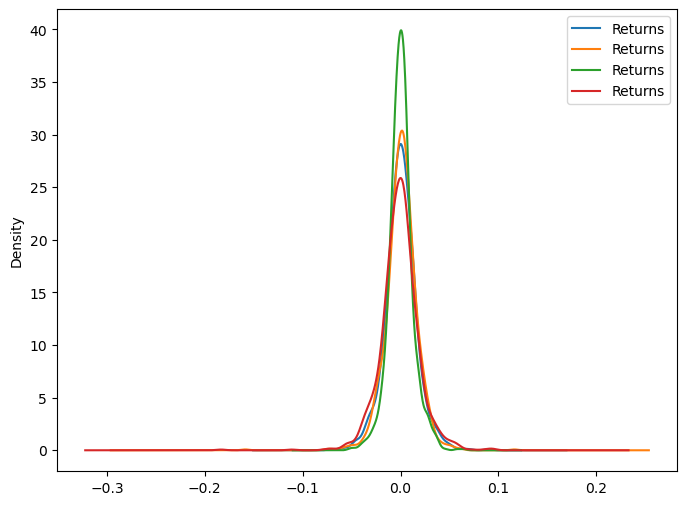

In [120]:
#7. Plot
DF['Returns'] = (DF["Close"] - DF["Open"])/DF["Open"] 
p_df = DF[['Company', 'Returns']]
fig, ax = plt.subplots(figsize=(8,6))
bp = p_df.groupby('Company').plot(kind='kde', ax=ax)